# **Lab 4: Program to Implement Non-linear Spatial Filtering**
### **Domain: Earth Science**

---

## **1. Introduction**
This lab focuses on the implementation of various non-linear spatial filtering techniques for image processing, specifically applied to satellite imagery in the context of Earth Science. These filters are used to enhance images by reducing noise, highlighting features, or smoothing variations.

## **2. Import Necessary Libraries**


In [7]:
# Import necessary libraries
import cv2  # OpenCV library for image processing
import numpy as np  # Numerical operations with arrays
from scipy.ndimage import generic_filter  # For applying custom filters
import matplotlib.pyplot as plt  # For displaying images

## **3. Load an Example Image**


In [11]:
# Load an example image (grayscale)
image_path = r'/content/egetation-change-map-of-Bengaluru-2006-2019.png'

# Read the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded
if image is None:
    print("Error: Image not found. Please check the file path.")


## **4. Non-linear Spatial Filtering Techniques**

### **4.1 Median Filter**
Replaces each pixel with the median of its neighborhood, effectively reducing noise while preserving edges.


In [12]:
def median_filter_builtin(image, kernel_size=3):
    """Applies a median filter using the built-in function."""
    return cv2.medianBlur(image, kernel_size)

def median_filter_user_defined(image, kernel_size=3):
    """Applies a median filter using a user-defined function."""
    return generic_filter(image, np.median, size=kernel_size)


### **4.2 Max Filter**
 Highlights the brightest pixels in a neighborhood, making bright features more prominent.



In [13]:
def max_filter_builtin(image, kernel_size=3):
    """Applies a max filter using the built-in dilation method."""
    return cv2.dilate(image, np.ones((kernel_size, kernel_size), np.uint8))

def max_filter_user_defined(image, kernel_size=3):
    """Applies a max filter using a user-defined function."""
    return generic_filter(image, np.max, size=kernel_size)


### **4.3 Min Filter**
Enhances dark areas in an image while reducing bright noise.



In [14]:
def min_filter_builtin(image, kernel_size=3):
    """Applies a min filter using the built-in erosion method."""
    return cv2.erode(image, np.ones((kernel_size, kernel_size), np.uint8))

def min_filter_user_defined(image, kernel_size=3):
    """Applies a min filter using a user-defined function."""
    return generic_filter(image, np.min, size=kernel_size)


### **4.4 Midpoint Filter**
Averages the maximum and minimum values in the neighborhood, providing a smoothing effect.



In [15]:
def midpoint_filter_user_defined(image, kernel_size=3):
    """Applies a midpoint filter using a user-defined function."""
    def midpoint(values):
        return (np.max(values) + np.min(values)) / 2
    return generic_filter(image, midpoint, size=kernel_size)


### **4.5 Alpha-Trimmed Mean Filter**
Removes a specified number of extreme values before averaging, reducing the impact of outliers while retaining details.


In [16]:
def alpha_trimmed_mean_filter_user_defined(image, kernel_size=3, d=2):
    """Applies an alpha-trimmed mean filter."""
    def alpha_trimmed_mean(values):
        sorted_values = np.sort(values)
        trimmed_values = sorted_values[d // 2: -d // 2]
        return np.mean(trimmed_values)

    return generic_filter(image, alpha_trimmed_mean, size=kernel_size)


## **5. Apply Filters to the Image**


In [17]:
# Apply each filter to the image
median_filtered_builtin = median_filter_builtin(image)
median_filtered_user_defined = median_filter_user_defined(image)
max_filtered_builtin = max_filter_builtin(image)
max_filtered_user_defined = max_filter_user_defined(image)
min_filtered_builtin = min_filter_builtin(image)
min_filtered_user_defined = min_filter_user_defined(image)
midpoint_filtered_user_defined = midpoint_filter_user_defined(image)
alpha_trimmed_filtered_user_defined = alpha_trimmed_mean_filter_user_defined(image, d=2)


## **6. Display Results of Filtering**


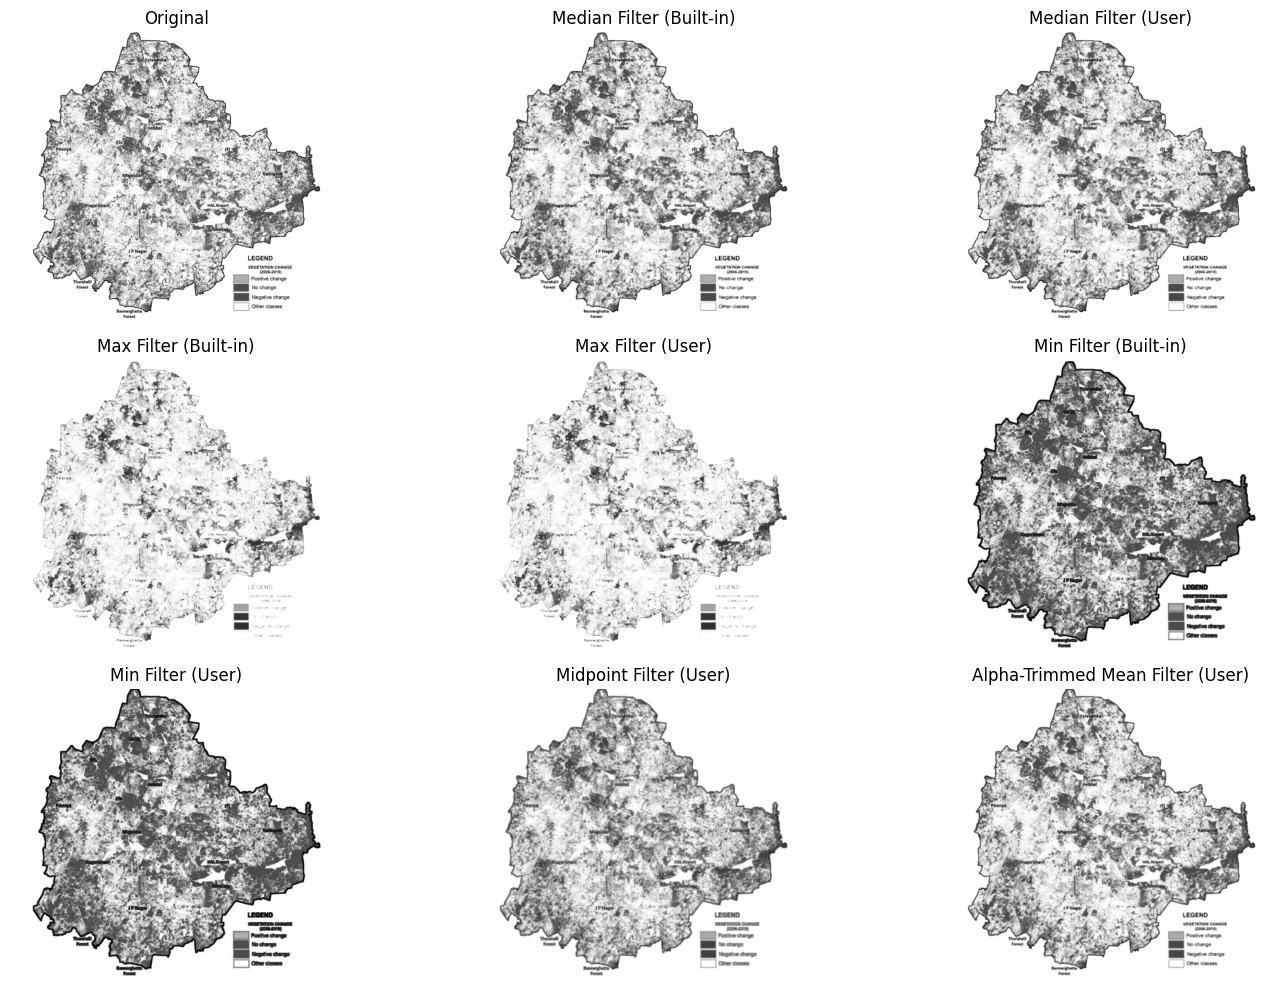

In [18]:
# Display the results of filtering
filters = [
    image, median_filtered_builtin, median_filtered_user_defined,
    max_filtered_builtin, max_filtered_user_defined,
    min_filtered_builtin, min_filtered_user_defined,
    midpoint_filtered_user_defined, alpha_trimmed_filtered_user_defined
]
titles = [
    "Original", "Median Filter (Built-in)", "Median Filter (User)",
    "Max Filter (Built-in)", "Max Filter (User)",
    "Min Filter (Built-in)", "Min Filter (User)",
    "Midpoint Filter (User)", "Alpha-Trimmed Mean Filter (User)"
]

# Create a figure for displaying the images
plt.figure(figsize=(15, 10))
for i in range(len(filters)):
    plt.subplot(3, 3, i+1)
    plt.imshow(filters[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


## **7. Inference of Filter Outputs**
The image displays the outputs of various spatial filters applied to a map to enhance or modify its appearance. Here is a summary of the different outputs:

1. **Original**: The unfiltered image as a baseline reference.
2. **Median Filter (Built-in/User)**: Reduces noise effectively while maintaining edges.
3. **Max Filter (Built-in/User)**: Enhances bright features, highlighting prominent areas.
4. **Min Filter (Built-in/User)**: Enhances dark regions and reduces bright noise.
5. **Midpoint Filter (User)**: Smoothens the image by balancing bright and dark areas.
6. **Alpha-Trimmed Mean Filter (User)**: Reduces the impact of outliers while preserving important details.

## **8. Conclusion**
Non-linear spatial filtering techniques provide significant benefits in image processing, especially in applications relevant to Earth Science, such as satellite imagery analysis. Each filter exhibits unique characteristics, enabling tailored approaches to noise reduction, feature enhancement, and overall image improvement. This lab demonstrated the effectiveness of both built-in and user-defined functions for implementing these filters, highlighting their versatility in analyzing and interpreting spatial data. The use of non-linear filters is crucial for enhancing the clarity and quality of remote sensing images, facilitating better decision-making in environmental monitoring and land-use planning.

---
